<a href="https://colab.research.google.com/github/ademkakhadze/final/blob/main/dmfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression analysis**

In [5]:
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd


In [2]:
penguins = sns.load_dataset("penguins")

In [3]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [34]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [44]:
penguins = penguins.loc[:,['flipper_length_mm','body_mass_g']].fillna(penguins.mean())

In [45]:
x = penguins['flipper_length_mm']
y = penguins['body_mass_g']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


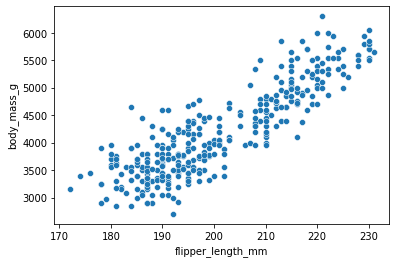

In [46]:
sns.scatterplot(x,y)

In [47]:
x = penguins['flipper_length_mm'].values.reshape(-1,1)
y = penguins['body_mass_g']

In [48]:
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
model.score(x,y)

0.7589925193571176

In [57]:
model.predict(x)

array([3212.25616143, 3460.68399346, 3907.85409111, 4201.75438596,
       3808.4829583 , 3659.42625908, 3212.25616143, 3907.85409111,
       3808.4829583 , 3659.42625908, 3460.68399346, 3162.57059502,
       3261.94172783, 3709.11182549, 4056.91079033, 3410.99842705,
       3907.85409111, 4007.22522392, 3361.31286065, 3858.16852471,
       2864.45719658, 3162.57059502, 3609.74069268, 3410.99842705,
       3162.57059502, 3510.36955986, 3311.62729424, 3510.36955986,
       2765.08606377, 3162.57059502, 3063.19946221, 3063.19946221,
       3560.05512627, 3361.31286065, 3907.85409111, 3957.53965752,
       3659.42625908, 3162.57059502, 3212.25616143, 3361.31286065,
       3261.94172783, 3907.85409111, 3460.68399346, 3957.53965752,
       3410.99842705, 3659.42625908, 3261.94172783, 3112.88502861,
       3659.42625908, 3709.11182549, 3460.68399346, 3560.05512627,
       3659.42625908, 4156.28192314, 3510.36955986, 3709.11182549,
       3460.68399346, 3808.4829583 , 3212.25616143, 3858.16852

In [59]:
x_new = np.random.rand(3,2).reshape(-1,1)
y_new = model.predict(x_new)
y_new

array([-5766.45766028, -5762.99531706, -5742.38819779, -5737.79087655,
       -5751.13950375, -5745.12341638])

# **Decision tree Model**

In [68]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing


In [111]:
penguins = sns.load_dataset("penguins")


In [112]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [117]:
penguins.sex[penguins.sex == 'Male'] = 1
penguins.sex[penguins.sex == 'Female'] = 2

penguins[["bill_length_mm",'bill_depth_mm','flipper_length_mm','body_mass_g']] = penguins[["bill_length_mm",'bill_depth_mm','flipper_length_mm','body_mass_g']].fillna(penguins.mean())
penguins.sex = penguins.sex.fillna(method='ffill')
penguins

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,1
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,2
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,2
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,2
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,2
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,2
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,2
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,1
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,2


In [133]:

x = penguins[["bill_length_mm",'bill_depth_mm','flipper_length_mm','body_mass_g']]
y = penguins.sex


In [123]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [124]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1])

In [125]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8461538461538461


# **Neural Nerwork**

In [139]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler


In [129]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [140]:

x = penguins[["bill_length_mm",'bill_depth_mm','flipper_length_mm','body_mass_g']]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
y = penguins.sex
X_scaled

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

In [141]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_scaled, y, epochs=15, batch_size=10)


Epoch 1/15


ValueError: ignored